In [120]:
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
import seaborn as sns
from PIL import Image
from behavioral_analysis.utility.builtin_classes.objects import load_object
from behavioral_analysis.visualization.matplotlib_funcs import add_identity_line, add_xy_line, add_xy_annotation
from behavioral_analysis.visualization.pil_funcs import resize_with_preserved_aspect_ratio, ensure_pil_image
from behavioral_analysis.visualization.plots import load_arena_from_json, plot_polygons
from behavioral_analysis.visualization.video_funcs import get_frames
from matplotlib.lines import Line2D
from shapely import Polygon

In [14]:
root_dir = pathlib.Path(r"D:\Folder With Backup\2019_paper\data")
data_out_dir = root_dir / "data_output"
plot_out_dir = root_dir / "plot_output"
annotations_dir = root_dir / "annotations"

videos_dir = root_dir / "videos_remuxed"
verification_videos_dir = plot_out_dir / "verification" / "tracked_videos"

In [ ]:
# plotting parameters
import matplotlib.pyplot as plt
plt.rcParams["ps.fonttype"] = 42  # set type 42 (truetype) fonts for ps, instead of type 3
plt.rcParams["pdf.fonttype"] = 42  # set type 42 (truetype) fonts for pdf, instead of type 3

import seaborn as sns
sns.set_theme(style="white")

import matplotlib.pyplot as plt
from math import sqrt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE, title_fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

plt.rc("lines", markersize=2, linewidth=1)
plt.rc("axes", linewidth=0.5)

plt.rc("xtick", bottom=True)
plt.rcParams["xtick.major.size"] = 3
plt.rcParams["xtick.major.width"] = 0.5
plt.rc("ytick", left=True)
plt.rcParams["ytick.major.size"] = 3
plt.rcParams["ytick.major.width"] = 0.5

# plt.rc("text", usetex=True)
# plt.rc("text.latex", preamble=r"\usepackage[usenames]{xcolor}")


# Figure 5 (Looming stimulus)

In [ ]:
local_data_out_dir = data_out_dir / "looming_stimulus"
local_videos_dir = videos_dir / "looming_stimulus"
local_annotations_dir = annotations_dir / "looming_stimulus"
local_verification_videos_dir = verification_videos_dir / "looming_stimulus"

In [36]:
arena_dict_path = local_annotations_dir / "cohort1" / "arena_dict.json"
new_arena_dict = load_arena_from_json(arena_dict_path)

verification_video_paths = list((local_verification_videos_dir / "cohort2").glob("*.mp4"))

track_data_df = load_object(local_data_out_dir / "track_data_df.pkl")
mouse_median_speed_df = load_object(local_data_out_dir / "mouse_median_speed_df.pkl")
short_name_behavior_group_dict = load_object(local_data_out_dir / "short_name_behavior_group_dict.pkl")
loom_speed_df = load_object(local_data_out_dir / "loom_speed_df.pkl")

In [27]:
mouse_median_speed_df.drop("short_name", axis=1).reset_index().groupby("behavior_group")[["source"]].value_counts().sort_index()

behavior_group  source       
fleeing         Charles River     4
                Internal          2
                Janvier           1
not fleeing     Charles River     8
                Internal         10
                Janvier          11
Name: count, dtype: int64

In [29]:
mouse_median_speed_df.drop("short_name", axis=1).reset_index().groupby("behavior_group")[["cohort_id", "source"]].value_counts().sort_index()

behavior_group  cohort_id  source       
fleeing         1          Charles River    2
                           Internal         2
                2          Charles River    2
                           Janvier          1
not fleeing     1          Charles River    2
                           Internal         2
                           Janvier          4
                2          Charles River    6
                           Internal         8
                           Janvier          7
Name: count, dtype: int64

## Panel B

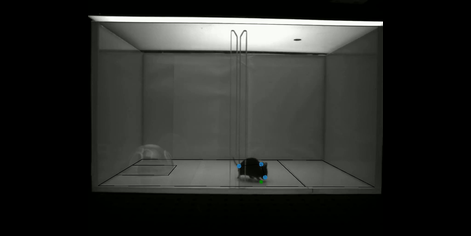

In [ ]:
example_index = 0
example_video = verification_video_paths[example_index]

example_frame = get_frames(example_video, [100])[0][:, :, ::-1]
example_pil = ensure_pil_image(example_frame)

fig_size_cm =  (12, 6)
fig_size = (fig_size_cm[0]/2.54, fig_size_cm[1]/2.54)
dpi = 100

fig_size_px = (int(fig_size[0]*dpi), int(fig_size[1]*dpi))

resized_image = resize_with_preserved_aspect_ratio(example_pil, fig_size_px, resample=Image.Resampling.LANCZOS, pad_color=(0, 0, 0))
resized_image.save(plot_out_dir / "Fig5PanelB.png", dpi=(dpi, dpi))
resized_image

## Panel C

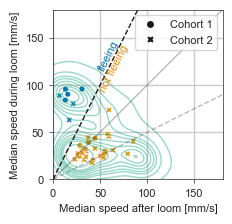

In [ ]:
fig_size_cm = (6, 6)
fig_size = (fig_size_cm[0]/2.54, fig_size_cm[1]/2.54)

palette = sns.color_palette("colorblind", n_colors=4)
up_change_color, no_change_color, down_change_color = palette[:3]
kde_color = palette[3]

palette = sns.color_palette("colorblind", n_colors=3)
not_fleeing_color, fleeing_color = palette[:2]
kde_color = palette[2]

fig, ax = plt.subplots(figsize=fig_size)
ax.set_aspect("equal")
ax.grid()
sns.scatterplot(mouse_median_speed_df.reset_index(), x="post", y="loom", ax=ax, s=16,
                style="cohort_id", markers={1: "o", 2: "X"},
                hue="behavior_group", palette={"not fleeing": no_change_color, "fleeing": up_change_color}, 
                legend=False)
sns.kdeplot(loom_speed_df.reset_index(), x="post", y="loom", ax=ax, alpha=0.4, color=kde_color, legend=False)
add_identity_line(ax, color="k", alpha=0.3)
add_xy_line(ax, xy_factor=2, ls="--", color="k")
add_xy_annotation(ax, "fleeing", relative_position=0.8, xy_factor=2, va="bottom", ha="right", color=up_change_color, size=SMALL_SIZE)
add_xy_annotation(ax, "not fleeing", relative_position=0.8, xy_factor=2, va="top", ha="right", color=no_change_color, size=SMALL_SIZE)

add_xy_line(ax, 0.5, ls="--", color="k", alpha=0.3)

cohort1_marker = Line2D([], [], label='Cohort 1', color='k', marker="o", markeredgecolor="none", ls="", ms=5)
cohort2_marker = Line2D([], [], label='Cohort 2', color='k', marker="X", markeredgecolor="none", ls="", ms=5)
ax.legend(handles=[cohort1_marker, cohort2_marker], ncols=1, loc="upper right")

ax.set_xlabel("Median speed after loom [mm/s]")
ax.set_ylabel("Median speed during loom [mm/s]")
adj_max_value = loom_speed_df[["loom", "post"]].stack().quantile(0.999) * 1.1
ax.set_xlim([0, adj_max_value])
ax.set_ylim([0, adj_max_value])

fig.tight_layout()
fig.savefig(plot_out_dir / "Fig5PanelC.svg", dpi=100)
plt.show()

## Panel D

C:\Users\marti\AppData\Local\Temp\ipykernel_1692\3099840772.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  out_of_bounds_data = out_of_bounds_data.groupby("short_name").apply(lambda x: len(x["speed_ratio"].dropna()))
C:\Users\marti\AppData\Local\Temp\ipykernel_1692\3099840772.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(new_xticklabels)
C:\Users\marti\AppData\Local\Temp\ipykernel_1692\3099840772.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(new_xticklabels)


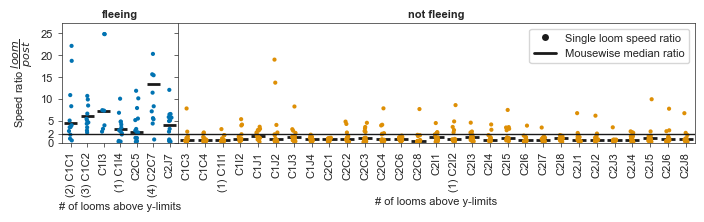

In [ ]:
fig_size_cm = (18, 6)
fig_size = (fig_size_cm[0]/2.54, fig_size_cm[1]/2.54)

hsl_palette = sns.color_palette("hls", n_colors=loom_speed_df["short_name"].nunique())
hsl_color_dict = {short_name: up_change_color if behavior_group == "fleeing" else no_change_color for short_name, behavior_group in short_name_behavior_group_dict.items()}

group_ratios = loom_speed_df["behavior_group"].value_counts(normalize=True)[["fleeing", "not fleeing"]]
loom_counts = loom_speed_df["short_name"].value_counts()

y_max = loom_speed_df["speed_ratio"].quantile(0.975) * 1.1

out_of_bounds_data = loom_speed_df.where(loom_speed_df["speed_ratio"].ge(y_max)).copy()
out_of_bounds_data = out_of_bounds_data.groupby("short_name").apply(lambda x: len(x["speed_ratio"].dropna()))
out_of_bounds_counts = out_of_bounds_data.reindex(loom_counts.index, fill_value=0).to_dict()

fig, axs = plt.subplots(1, 2, sharey=True, figsize=fig_size, sharex=False, width_ratios=group_ratios)

fleeing_loom_speed_df = loom_speed_df.where(loom_speed_df["behavior_group"].eq("fleeing"))
fleeing_loom_speed_df = fleeing_loom_speed_df.sort_values("short_name", ascending=True)

sns.stripplot(fleeing_loom_speed_df.reset_index(), x="short_name", y="speed_ratio", hue="short_name", ax=axs[0], legend=False, palette=hsl_color_dict, size=3, zorder=1)
# plot the mean line
sns.boxplot(showmeans=False,
            medianprops={'visible': True, 'color': 'k', 'ls': '-', 'lw': 2},
            whiskerprops={'visible': False},
            zorder=0,
            x="short_name",
            y="speed_ratio",
            color="k",
            data=fleeing_loom_speed_df.reset_index(),
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=axs[0])

axs[0].set_ylim([0, y_max])

axs[0].tick_params(axis='x', rotation=90)
old_xticklabels = [tl.get_text() for tl in axs[0].get_xticklabels()]
new_xticklabels = [f"({out_of_bounds_counts[tl]}) {tl}" if out_of_bounds_counts[tl]>0 else tl for tl in old_xticklabels]
axs[0].set_xticklabels(new_xticklabels)

axs[0].set_yticks(list(axs[0].get_yticks()) + [2])

axs[0].axhline(2, color="k")

not_fleeing_loom_speed_df = loom_speed_df.where(loom_speed_df["behavior_group"].eq("not fleeing"))
not_fleeing_loom_speed_df = not_fleeing_loom_speed_df.sort_values("short_name", ascending=True)

sns.stripplot(not_fleeing_loom_speed_df.reset_index(), x="short_name", y="speed_ratio", hue="short_name", ax=axs[1], legend=False, palette=hsl_color_dict, size=3, zorder=1)
# plot the mean line
sns.boxplot(showmeans=False,
            medianprops={'visible': True, 'color': 'k', 'ls': '-', 'lw': 2},
            whiskerprops={'visible': False},
            zorder=0,
            x="short_name",
            y="speed_ratio",
            color="k",
            data=not_fleeing_loom_speed_df.reset_index(),
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=axs[1])

axs[1].set_ylim([0, y_max])

axs[1].tick_params(axis='x', rotation=90)
old_xticklabels = [tl.get_text() for tl in axs[1].get_xticklabels()]
new_xticklabels = [f"({out_of_bounds_counts[tl]}) {tl}" if out_of_bounds_counts[tl]>0 else tl for tl in old_xticklabels]
axs[1].set_xticklabels(new_xticklabels)

axs[1].axhline(2, color="k")

loom_marker = Line2D([], [], label='Single loom speed ratio', color='k', marker="o", markeredgecolor="none", ls="", ms=5)
median_marker = Line2D([], [], label='Mousewise median ratio', color='k', marker="none", markeredgecolor="none", ls="-", lw=2)
axs[1].legend(handles=[loom_marker, median_marker], ncols=1, loc="upper right")


axs[0].set_ylabel(r"Speed ratio $\dfrac{loom}{post}$")
axs[0].set_xlabel("# of looms above y-limits")
axs[0].set_title("fleeing", fontweight="bold", pad=4)
axs[1].set_xlabel("# of looms above y-limits")
axs[1].set_title("not fleeing", fontweight="bold", pad=4)

fig.tight_layout()
fig.subplots_adjust(top=0.85, wspace=0)

fig.savefig(plot_out_dir / "Fig5PanelD.svg", dpi=100)
plt.show()

## Panel E

C:\Users\marti\AppData\Local\Temp\ipykernel_1692\3424082104.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_track_data = track_data_df[loom_speed_df["speed_ratio"] > 2]


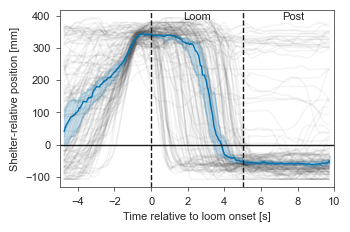

In [46]:
filtered_track_data = track_data_df[loom_speed_df["speed_ratio"] > 2]
filtered_track_data = filtered_track_data.loc[pd.IndexSlice[:, :, :, 15:899-15]]
framewise_group = filtered_track_data.groupby("frame_index")["shelter_relative_x"]
loomwise_group = filtered_track_data.groupby(["cohort_id", "mouse_id", "loom_id"])

fig_size_cm = (9, 6)
fig_size = (fig_size_cm[0]/2.54, fig_size_cm[1]/2.54)

fig, ax = plt.subplots(figsize=fig_size)
loomwise_group.plot(kind="line", x="loom_seconds", y="shelter_relative_x", color="k", alpha=0.05, ax=ax, legend=False, zorder=0)
sns.lineplot(data=filtered_track_data, x="loom_seconds", y="shelter_relative_x", color=up_change_color, estimator="median", errorbar=("ci", 95), ax=ax, legend=False, zorder=1)
ax.set_xlim([-5, 10])
ax.axvline(x=0, color="k", linestyle="--")
ax.axvline(x=5, color="k", linestyle="--")
ax.axhline(y=0, color="k", linestyle="-")
ax.text(0.5, 0.99, "Loom", transform=ax.transAxes, ha="center", va="top")
ax.text(0.85, 0.99, "Post", transform=ax.transAxes, ha="center", va="top")

ax.set_xlabel("Time relative to loom onset [s]")
ax.set_ylabel("Shelter-relative position [mm]")

fig.tight_layout()
fig.savefig(plot_out_dir / "Fig5PanelE.svg", dpi=100)
plt.show()

## Panel F

C:\Users\marti\AppData\Local\Temp\ipykernel_1692\3732325432.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_track_data = track_data_df[loom_speed_df["speed_ratio"] <= 2]


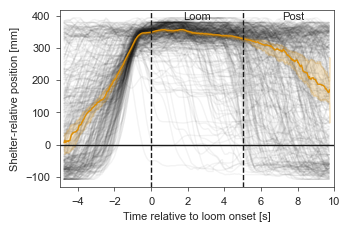

In [47]:
filtered_track_data = track_data_df[loom_speed_df["speed_ratio"] <= 2]
filtered_track_data = filtered_track_data.loc[pd.IndexSlice[:, :, :, 15:899-15]]
framewise_group = filtered_track_data.groupby("frame_index")["shelter_relative_x"]
loomwise_group = filtered_track_data.groupby(["cohort_id", "mouse_id", "loom_id"])

fig_size_cm = (9, 6)
fig_size = (fig_size_cm[0]/2.54, fig_size_cm[1]/2.54)

fig, ax = plt.subplots(figsize=fig_size)
loomwise_group.plot(kind="line", x="loom_seconds", y="shelter_relative_x", color="k", alpha=0.05, ax=ax, legend=False, zorder=0)
sns.lineplot(data=filtered_track_data, x="loom_seconds", y="shelter_relative_x", color=no_change_color, estimator="median", errorbar=("ci", 95), ax=ax, legend=False, zorder=1)
ax.set_xlim([-5, 10])
ax.axvline(x=0, color="k", linestyle="--")
ax.axvline(x=5, color="k", linestyle="--")
ax.axhline(y=0, color="k", linestyle="-")
ax.text(0.5, 0.99, "Loom", transform=ax.transAxes, ha="center", va="top")
ax.text(0.85, 0.99, "Post", transform=ax.transAxes, ha="center", va="top")

ax.set_xlabel("Time relative to loom onset [s]")
ax.set_ylabel("Shelter-relative position [mm]")

fig.tight_layout()
fig.savefig(plot_out_dir / "Fig5PanelF.svg", dpi=100)
plt.show()

# Figure 6 (Rat Odor)

In [53]:
local_data_out_dir = data_out_dir / "rat_odor"
local_annotations_dir = annotations_dir / "rat_odor"
local_verification_videos_dir = verification_videos_dir / "rat_odor"

In [54]:
arena_dict_path = local_annotations_dir / "cohort1" / "arena_dict.json"
old_arena_dict = load_arena_from_json(arena_dict_path)

verification_video_paths = list((local_verification_videos_dir / "cohort2").glob("*.mp4"))

track_data_df = load_object(local_data_out_dir / "track_data_df.pkl")
polygon_proportion_df = load_object(local_data_out_dir / "polygon_proportion_df.pkl")
clean_preference_change = load_object(local_data_out_dir / "clean_preference_change.pkl")
preferring_track_data_df = load_object(local_data_out_dir / "preferring_track_data_df.pkl")

In [55]:
clean_preference_change.reset_index().groupby("behavior_group")[["source"]].value_counts().sort_index()

behavior_group  source       
avoiding        Charles River     1
no change       Charles River    10
                Internal         10
                Janvier           9
preferring      Charles River     1
                Internal          2
                Janvier           3
Name: count, dtype: int64

In [57]:
clean_preference_change.reset_index().groupby("behavior_group")[["cohort_id", "source"]].value_counts().sort_index()

behavior_group  cohort_id  source       
avoiding        2          Charles River    1
no change       1          Charles River    4
                           Internal         2
                           Janvier          2
                2          Charles River    6
                           Internal         8
                           Janvier          7
preferring      1          Internal         2
                           Janvier          2
                2          Charles River    1
                           Janvier          1
Name: count, dtype: int64

## Panel B

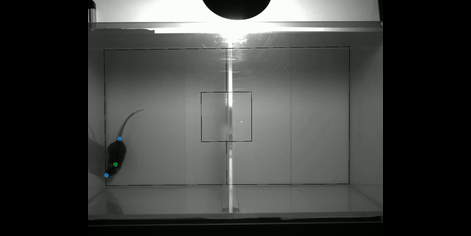

In [ ]:
example_index = 0
example_video = verification_video_paths[example_index]

example_frame = get_frames(example_video, [0])[0][:, :, ::-1]
example_pil = ensure_pil_image(example_frame)

fig_size_cm =  (12, 6)
fig_size = (fig_size_cm[0]/2.54, fig_size_cm[1]/2.54)
dpi = 100

fig_size_px = (int(fig_size[0]*dpi), int(fig_size[1]*dpi))

resized_image = resize_with_preserved_aspect_ratio(example_pil, fig_size_px, resample=Image.Resampling.LANCZOS, pad_color=(0, 0, 0))
resized_image.save(plot_out_dir / "Fig6PanelB.png", dpi=(dpi, dpi))
resized_image

## Panel C

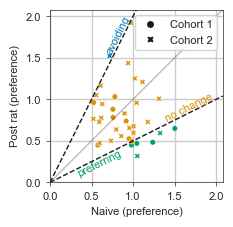

In [ ]:
palette = sns.color_palette("colorblind", n_colors=4)
up_change_color, no_change_color, down_change_color = palette[:3]
kde_color = palette[3]

fig_size_cm = (6, 6)
fig_size = (fig_size_cm[0]/2.54, fig_size_cm[1]/2.54)

fig, ax = plt.subplots(figsize=fig_size)
ax.set_aspect("equal")
ax.grid()
sns.scatterplot(clean_preference_change.reset_index(), x="WithoutOdor", y="WithOdor", ax=ax, s=16, 
                style="cohort_id", markers={1: "o", 2: "X"},
                hue="behavior_group", palette={"avoiding": up_change_color, "no change": no_change_color, "preferring": down_change_color}, 
                legend=False)
add_identity_line(ax, color="k", alpha=0.3)
add_xy_line(ax, xy_factor=2, ls="--", color="k")
add_xy_annotation(ax, "avoiding", relative_position=0.95, xy_factor=2, va="bottom", ha="right", color=up_change_color, size=SMALL_SIZE)

add_xy_line(ax, 0.5, ls="--", color="k")
add_xy_annotation(ax, "no change", relative_position=0.95, xy_factor=0.5, va="bottom", ha="right", color=no_change_color, size=SMALL_SIZE)
add_xy_annotation(ax, "preferring", relative_position=0.15, xy_factor=0.5, va="top", ha="left", color=down_change_color, size=SMALL_SIZE)

cohort1_marker = Line2D([], [], label='Cohort 1', color='k', marker="o", markeredgecolor="none", ls="", ms=5)
cohort2_marker = Line2D([], [], label='Cohort 2', color='k', marker="X", markeredgecolor="none", ls="", ms=5)
ax.legend(handles=[cohort1_marker, cohort2_marker], ncols=1, loc="upper right")

ax.set_xlabel("Naive (preference)")
ax.set_ylabel("Post rat (preference)")
adj_max_value = clean_preference_change[["WithoutOdor", "WithOdor"]].stack().quantile(0.999) * 1.1
ax.set_xlim([0, adj_max_value])
ax.set_ylim([0, adj_max_value])

fig.tight_layout()
fig.savefig(plot_out_dir / "Fig6PanelC.svg", dpi=100)
plt.show()

## Panel D

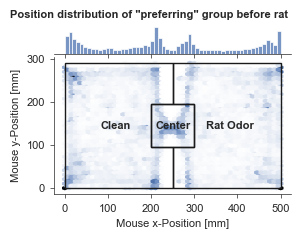

In [ ]:
fig_size_cm = (9, 6)
fig_size = (fig_size_cm[0]/2.54, fig_size_cm[1]/2.54)

g = sns.jointplot(data=preferring_track_data_df.loc[pd.IndexSlice[:, :, "WithoutOdor"]], x="smoothed_x", y="smoothed_y", kind="hex", space=0)

plot_polygons(old_arena_dict, ax=g.ax_joint, polygon_color="k", label_kwargs=dict(bbox=dict(facecolor="none", edgecolor="none"), size=SMALL_SIZE))
g.ax_marg_y.remove()
g.ax_joint.set_aspect("equal")

g.ax_joint.set_xlabel("Mouse x-Position [mm]")
g.ax_joint.set_ylabel("Mouse y-Position [mm]")
g.ax_marg_x.set_title("Position distribution of \"preferring\" group before rat", x=0.4, fontweight="bold", fontsize=SMALL_SIZE)

g.fig.set_figwidth(fig_size[0])
g.fig.set_figheight(fig_size[1])
g.fig.subplots_adjust(top=0.95, hspace=0)

g.fig.tight_layout()
g.fig.subplots_adjust(hspace=0)
g.savefig(plot_out_dir / "Fig6PanelD.svg", dpi=100, bbox_inches="tight")
plt.show()

## Panel E

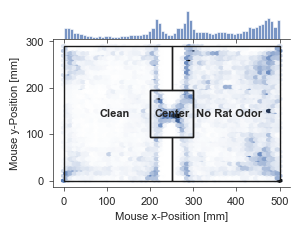

In [ ]:
fig_size_cm = (9, 6)
fig_size = (fig_size_cm[0]/2.54, fig_size_cm[1]/2.54)

g = sns.jointplot(data=preferring_track_data_df.loc[pd.IndexSlice[:, :, "WithOdor"]], x="smoothed_x", y="smoothed_y", kind="hex")
g.ax_marg_y.remove()

adjusted_old_arena_dict = old_arena_dict.copy()
adjusted_old_arena_dict["No Rat Odor"] = adjusted_old_arena_dict.pop("Rat Odor")
plot_polygons(adjusted_old_arena_dict, ax=g.ax_joint, polygon_color="k", label_kwargs=dict(bbox=dict(facecolor="none", edgecolor="none"), size=SMALL_SIZE))

g.ax_joint.set_xlabel("Mouse x-Position [mm]")
g.ax_joint.set_ylabel("Mouse y-Position [mm]")

g.fig.set_figwidth(fig_size[0])
g.fig.set_figheight(fig_size[1])
g.fig.tight_layout()
g.fig.subplots_adjust(hspace=0)

g.fig.savefig(plot_out_dir / "Fig6PanelE.svg", dpi=100)
plt.show()

# Figure 7

In [104]:
local_data_out_dir = data_out_dir / "rat_presence"
local_annotations_dir = annotations_dir / "rat_presence"
local_verification_videos_dir = verification_videos_dir / "rat_presence"

In [105]:
arena_dict_path = local_annotations_dir / "cohort1" / "arena_dict.json"
old_arena_dict = load_arena_from_json(arena_dict_path)

verification_video_paths = list((local_verification_videos_dir / "cohort2").glob("*.mp4"))

track_data_df = load_object(local_data_out_dir / "track_data_df.pkl")
polygon_proportion_df = load_object(local_data_out_dir / "polygon_proportion_df.pkl")
mesh_avoidance_change = load_object(local_data_out_dir / "mesh_avoidance_change.pkl")
avoiding_track_data_df = load_object(local_data_out_dir / "avoiding_track_data_df.pkl")

In [101]:
mesh_avoidance_change.reset_index().groupby("behavior_group")[["source"]].value_counts().sort_index()

behavior_group  source       
avoiding        Charles River    5
                Internal         8
                Janvier          5
no change       Charles River    7
                Internal         3
                Janvier          5
preferring      Internal         1
                Janvier          2
Name: count, dtype: int64

In [102]:
mesh_avoidance_change.reset_index().groupby("behavior_group")[["cohort_id", "source"]].value_counts().sort_index()

behavior_group  cohort_id  source       
avoiding        1          Charles River    1
                           Internal         3
                           Janvier          1
                2          Charles River    4
                           Internal         5
                           Janvier          4
no change       1          Charles River    3
                           Janvier          3
                2          Charles River    4
                           Internal         3
                           Janvier          2
preferring      1          Internal         1
                2          Janvier          2
Name: count, dtype: int64

## Panel B

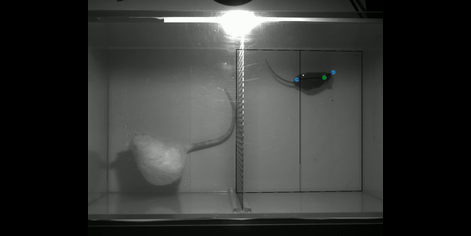

In [ ]:
example_index = 0
example_video = verification_video_paths[example_index]
example_frame = get_frames(example_video, [0])[0][:, :, ::-1]
example_pil = ensure_pil_image(example_frame)

fig_size_cm =  (12, 6)
fig_size = (fig_size_cm[0]/2.54, fig_size_cm[1]/2.54)
dpi = 100

fig_size_px = (int(fig_size[0]*dpi), int(fig_size[1]*dpi))

resized_image = resize_with_preserved_aspect_ratio(example_pil, fig_size_px, resample=Image.Resampling.LANCZOS, pad_color=(0, 0, 0))
resized_image.save(plot_out_dir / "Fig7PanelB.png", dpi=(dpi, dpi))
resized_image

## Panel C

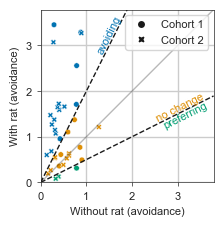

In [ ]:
fig_size_cm = (6, 6)
fig_size = (fig_size_cm[0]/2.54, fig_size_cm[1]/2.54)

palette = sns.color_palette("colorblind", n_colors=4)
up_change_color, no_change_color, down_change_color = palette[:3]
kde_color = palette[3]

fig, ax = plt.subplots(figsize=fig_size)
ax.set_aspect("equal")
ax.grid()
sns.scatterplot(mesh_avoidance_change.reset_index(), x="WithoutRat", y="WithRat", ax=ax, s=16, 
                style="cohort_id", markers={1: "o", 2: "X"},
                hue="behavior_group", palette={"avoiding": up_change_color, "no change": no_change_color, "preferring": down_change_color}, 
                legend=False)
add_identity_line(ax, color="k", alpha=0.3)
add_xy_line(ax, xy_factor=2, ls="--", color="k")
add_xy_annotation(ax, "avoiding", relative_position=0.95, xy_factor=2, va="bottom", ha="right", color=up_change_color, size=SMALL_SIZE)

add_xy_line(ax, 0.5, ls="--", color="k")
add_xy_annotation(ax, "no change", relative_position=0.95, xy_factor=0.5, va="bottom", ha="right", color=no_change_color, size=SMALL_SIZE)
add_xy_annotation(ax, "preferring", relative_position=0.95, xy_factor=0.5, va="top", ha="right", color=down_change_color, size=SMALL_SIZE)

cohort1_marker = Line2D([], [], label='Cohort 1', color='k', marker="o", markeredgecolor="none", ls="", ms=5)
cohort2_marker = Line2D([], [], label='Cohort 2', color='k', marker="X", markeredgecolor="none", ls="", ms=5)
ax.legend(handles=[cohort1_marker, cohort2_marker], ncols=1, loc="upper right")

ax.set_xlabel("Without rat (avoidance)")
ax.set_ylabel("With rat (avoidance)")
adj_max_value = mesh_avoidance_change[["WithoutRat", "WithRat"]].stack().quantile(0.999) * 1.1
ax.set_xlim([0, adj_max_value])
ax.set_ylim([0, adj_max_value])

fig.tight_layout()
fig.savefig(plot_out_dir / "Fig7PanelC.svg", dpi=100)
plt.show()

## Panel D

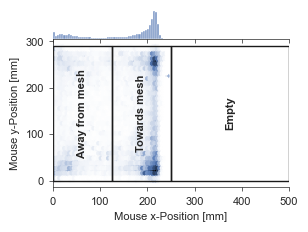

In [106]:
fig_size_cm = (9, 6)
fig_size = (fig_size_cm[0]/2.54, fig_size_cm[1]/2.54)

g = sns.jointplot(data=avoiding_track_data_df.loc[pd.IndexSlice[:, :, "WithoutRat"]], x="smoothed_x", y="smoothed_y", kind="hex", xlim=(0, 500))
g.ax_marg_y.remove()

adjusted_old_arena_dict = old_arena_dict.copy()
adjusted_old_arena_dict["Empty"] = Polygon([[250, 0], [500, 0], [500, 290], [250, 290]])
plot_polygons(adjusted_old_arena_dict, ax=g.ax_joint, polygon_color="k", label_kwargs=dict(bbox=dict(facecolor="none", edgecolor="none"), size=SMALL_SIZE, rotation=90))

g.ax_joint.set_xlabel("Mouse x-Position [mm]")
g.ax_joint.set_ylabel("Mouse y-Position [mm]")

g.fig.set_figwidth(fig_size[0])
g.fig.set_figheight(fig_size[1])
g.fig.tight_layout()
g.fig.subplots_adjust(hspace=0)

g.fig.savefig(plot_out_dir / "Fig7PanelD.svg", dpi=100)
plt.show()

## Panel E

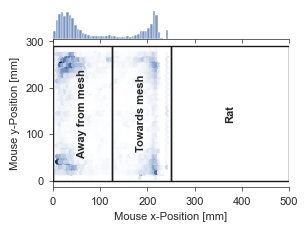

In [ ]:
from behavioral_analysis.visualization.plots import plot_polygons

fig_size_cm = (9, 6)
fig_size = (fig_size_cm[0]/2.54, fig_size_cm[1]/2.54)

g = sns.jointplot(data=avoiding_track_data_df.loc[pd.IndexSlice[:, :, "WithRat"]], x="smoothed_x", y="smoothed_y", kind="hex", xlim=(0, 500))
g.ax_marg_y.remove()

adjusted_old_arena_dict = old_arena_dict.copy()
adjusted_old_arena_dict["Rat"] = Polygon([[250, 0], [500, 0], [500, 290], [250, 290]])
plot_polygons(adjusted_old_arena_dict, ax=g.ax_joint, polygon_color="k", label_kwargs=dict(bbox=dict(facecolor="none", edgecolor="none"), size=SMALL_SIZE, rotation=90))

g.ax_joint.set_xlabel("Mouse x-Position [mm]")
g.ax_joint.set_ylabel("Mouse y-Position [mm]")

g.fig.set_figwidth(fig_size[0])
g.fig.set_figheight(fig_size[1])
g.fig.tight_layout()
g.fig.subplots_adjust(hspace=0)

g.fig.savefig(plot_out_dir / "Fig7PanelE.svg", dpi=100)
plt.show()

# Suppl. Figure 10

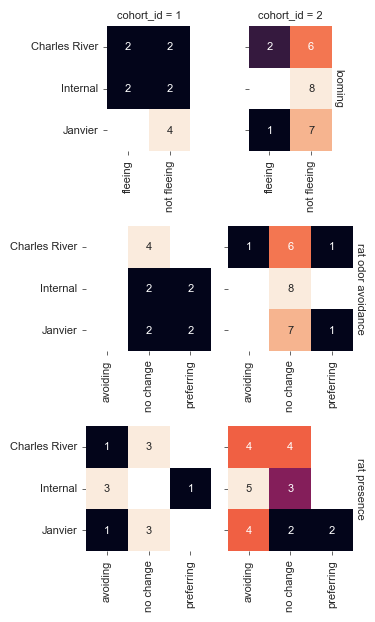

In [117]:
full_results_series = pd.concat({
    "looming": mouse_median_speed_df.reset_index().groupby("behavior_group")[["cohort_id", "source"]].value_counts().sort_index(),
    "rat odor avoidance": clean_preference_change.reset_index().groupby("behavior_group")[["cohort_id", "source"]].value_counts().sort_index().reindex(pd.MultiIndex.from_product([["avoiding", "no change", "preferring"], [1, 2], ["Charles River", "Internal", "Janvier"]], names=["behavior_group", "Cohort", "source"])),
    "rat presence": mesh_avoidance_change.reset_index().groupby("behavior_group")[["cohort_id", "source"]].value_counts().sort_index()
}, names=["experiment", "behavior_group", "cohort_id", "source"], axis=0)

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    sns.heatmap(d, **kwargs)

fg = sns.FacetGrid(full_results_series.rename("value").reset_index(), col='cohort_id', row="experiment", margin_titles=True, sharex=False, height=2)
fg.map_dataframe(draw_heatmap, 'behavior_group', 'source', 'value', cbar=False, square = True, annot=True)
fg.set_titles(row_template="{row_name}")

for ax in fg.axes.flatten():
    ax.tick_params(axis="x", rotation=90)
    ax.set_ylabel("")
    ax.set_xlabel("")

fg.fig.subplots_adjust(hspace=0.6)
g.fig.savefig(plot_out_dir / "SupplFig10.svg", dpi=100)
plt.show()